# Data Exploration - 3

## Carga de datos
Se realiza carga de datos obtenidos mediante web crawling a pollstar.com

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from pandas.plotting import lag_plot
import numpy  as np

In [54]:
# Se utiliza para agregar campo pais a la data cargada
def separator(x):
    ciudad, estado_pais = x.split(',', 1)
    if (len(estado_pais.strip()) == 2):
        estado_pais = "USA"
    elif ("Canada" in estado_pais):
         estado_pais = "Canada"
    return ciudad.strip(), estado_pais.strip()

In [55]:
filename = "/home/bberrios/experimento-1/filtrar/live_boxoffice-all-2.txt"
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
events = pd.read_csv(filename, sep='\t', parse_dates=['StartPlayDate'], date_parser=dateparse)
events['city'], events['country'] = zip(*events['cityStateCountry'].apply(separator))
events.head()

,StartPlayDate,sortName,eventName,venue,cityStateCountry,numTicketSold,capacity,capacityPercentage,ticketPriceFrom,ticketriceTo,grossUSD,currency,grossGate,numShows,city,country
0,2018-05-05,KENNY CHESNEY,Kenny Chesney,U.S. Bank Stadium,"Minneapolis, MN",48255,48255,100,29.00,260.00,4999184,US DOLLAR,4999184,1,Minneapolis,USA
1,2018-05-04,FOO FIGHTERS,Foo Fighters,Bridgestone Arena,"Nashville, TN",13537,13537,100,49.00,99.00,1264443,US DOLLAR,1264443,1,Nashville,USA
2,2018-05-02,SPRINGSTEEN ON BROADWAY,Springsteen On Broadway / Bruce Springsteen,Walter Kerr Theatre,"New York, NY",3792,948,100,75.00,850.00,1928605,US DOLLAR,1928605,4,New York,USA
3,2018-05-01,DON BROCO,Don Broco,Keele University,"Keele, United Kingdom",797,1100,73,25.00,28.00,27432,UK Pounds,19937,1,Keele,United Kingdom
4,2018-05-01,DARYL HALL JOHN OATES,Daryl Hall & John Oates / Train,Golden 1 Center,"Sacramento, CA",8840,10259,87,45.97,125.97,650141,US DOLLAR,650141,1,Sacramento,USA


## ¿Está relacionado el país con el éxito de un evento?

### Exploracion 3.1
Se toma solo el promedio de eventos por pais para ver si en alguno de ellos se concentran eventos éxitoso.

In [71]:
grouping_country = events.groupby('country', as_index = False)
grouping_country_aggregate = grouping_country['capacityPercentage'].agg(['mean', 'count']).replace(np.nan, 0, regex=True)
grouping_country_aggregate=grouping_country_aggregate.reset_index()
grouping_country_aggregate.sort_values(by = ['mean'], ascending = [0])

,country,mean,count
13,Italy,100.000000,2
21,Sweden,100.000000,1
19,South Africa,100.000000,1
18,Slovenia,100.000000,1
17,Poland,100.000000,2
16,New Zealand,100.000000,7
0,Argentina,97.000000,1
7,Costa Rica,96.000000,1
20,Spain,90.800000,10
12,Israel,90.500000,2


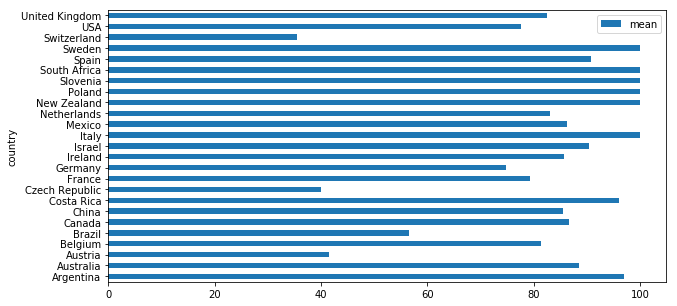

In [72]:
grouping_country_aggregate.plot(x = 'country', y = ['mean'], kind = 'barh', figsize=(10, 5))

Paises en donde en promedio los eventos son éxitoso:

In [73]:
success = grouping_country_aggregate[grouping_country_aggregate['mean'] >= 80]
success

,country,mean,count
0,Argentina,97.000000,1
1,Australia,88.574074,54
3,Belgium,81.349206,63
5,Canada,86.619565,184
6,China,85.500000,6
7,Costa Rica,96.000000,1
11,Ireland,85.750000,52
12,Israel,90.500000,2
13,Italy,100.000000,2
14,Mexico,86.300000,50


In [74]:
print success['country'].tolist()

['Argentina', 'Australia', 'Belgium', 'Canada', 'China', 'Costa Rica', 'Ireland', 'Israel', 'Italy', 'Mexico', 'Netherlands', 'New Zealand', 'Poland', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'United Kingdom']


Paises en donde en promedio los eventos no son exitosos:

In [87]:
no_success = grouping_country_aggregate[grouping_country_aggregate['mean'] <= 60]

In [88]:
print no_success['country'].tolist()

['Austria', 'Brazil', 'Czech Republic', 'Switzerland']


### Exploracion 3.2
Se contrasta con cantidad de eventos por pais


<BarContainer object of 25 artists>

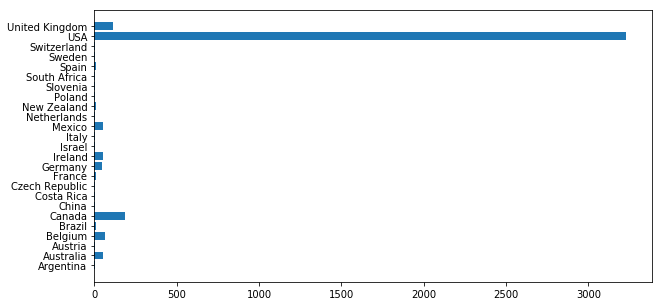

In [89]:
plt.figure(figsize=(10, 5))
plt.barh(grouping_country_aggregate['country'].tolist(), grouping_country_aggregate['count'])

In [93]:
grouping_country_aggregate.sort_values(by = ['count','mean'], ascending = [0,0])[:10]

,country,mean,count
23,USA,77.573908,3227
5,Canada,86.619565,184
24,United Kingdom,82.545455,110
3,Belgium,81.349206,63
1,Australia,88.574074,54
11,Ireland,85.750000,52
14,Mexico,86.300000,50
10,Germany,74.818182,44
20,Spain,90.800000,10
4,Brazil,56.600000,10
